## Plot up days to beaching

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sys import platform

%matplotlib inline

In [2]:
## User inputs.  As set up now, darwin -> paths on Rachael's "shuga" laptop 
## The other paths are for Vicky's Ocean setup

if platform == 'darwin':
    bathy_dir = '/Users/rmueller/Data/SalishSeaCast/grid/'
    results_dir = '/Users/rmueller/Projects/'
    out_dir = '/Users/rmueller/Projects/MIDOSS/analysis-rachael/notebooks/graphics/BeachingTimeScale/'
else:
    bathy_dir = '/data/vdo/MEOPAR/NEMO-forcing/grid/'
    results_dir = '/ocean/vdo/'
    out_dir = '/home/vdo/'
    
# Set to [1] if you want to print to file and [0] if not
print_to_file = 1    

In [3]:
# load bathymetry grid for plotting mask
grid = nc.Dataset(bathy_dir + 'bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)

In [4]:
# load data
# Note: The filename says SOG but the results show that it's not an SOG location
f0 = nc.Dataset(results_dir + 'MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_general_evap_fix2/Lagrangian_BunkerC_crude_SOG_21nov17-28nov17.nc')


In [12]:
## colourmap for the land/water. 
vmax = 1
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightskyblue'), #change this if you want a different colour for water
                                                    (0.85 / vmax, 'lightskyblue'), #change this if you want a different colour for water
                                                    (0.850001 / vmax, 'papayawhip'), #change this if you want a different colour for land
                                                    (1 / vmax, 'papayawhip')] #change this if you want a different colour for land
                                        )

In [5]:
#Gather beaching time scale values

xcoords0 = np.array([])
ycoords0 = np.array([])
values0 = np.array([])

# takes a little bit of time to run
for x in range(396):
    for y in range(896):
        if f0['Beaching_Time'][y,x] != 0:
            xcoords0 = np.append(xcoords0, x)
            ycoords0 = np.append(ycoords0, y)
            values0 = np.append(values0, f0['Beaching_Time'][y,x])

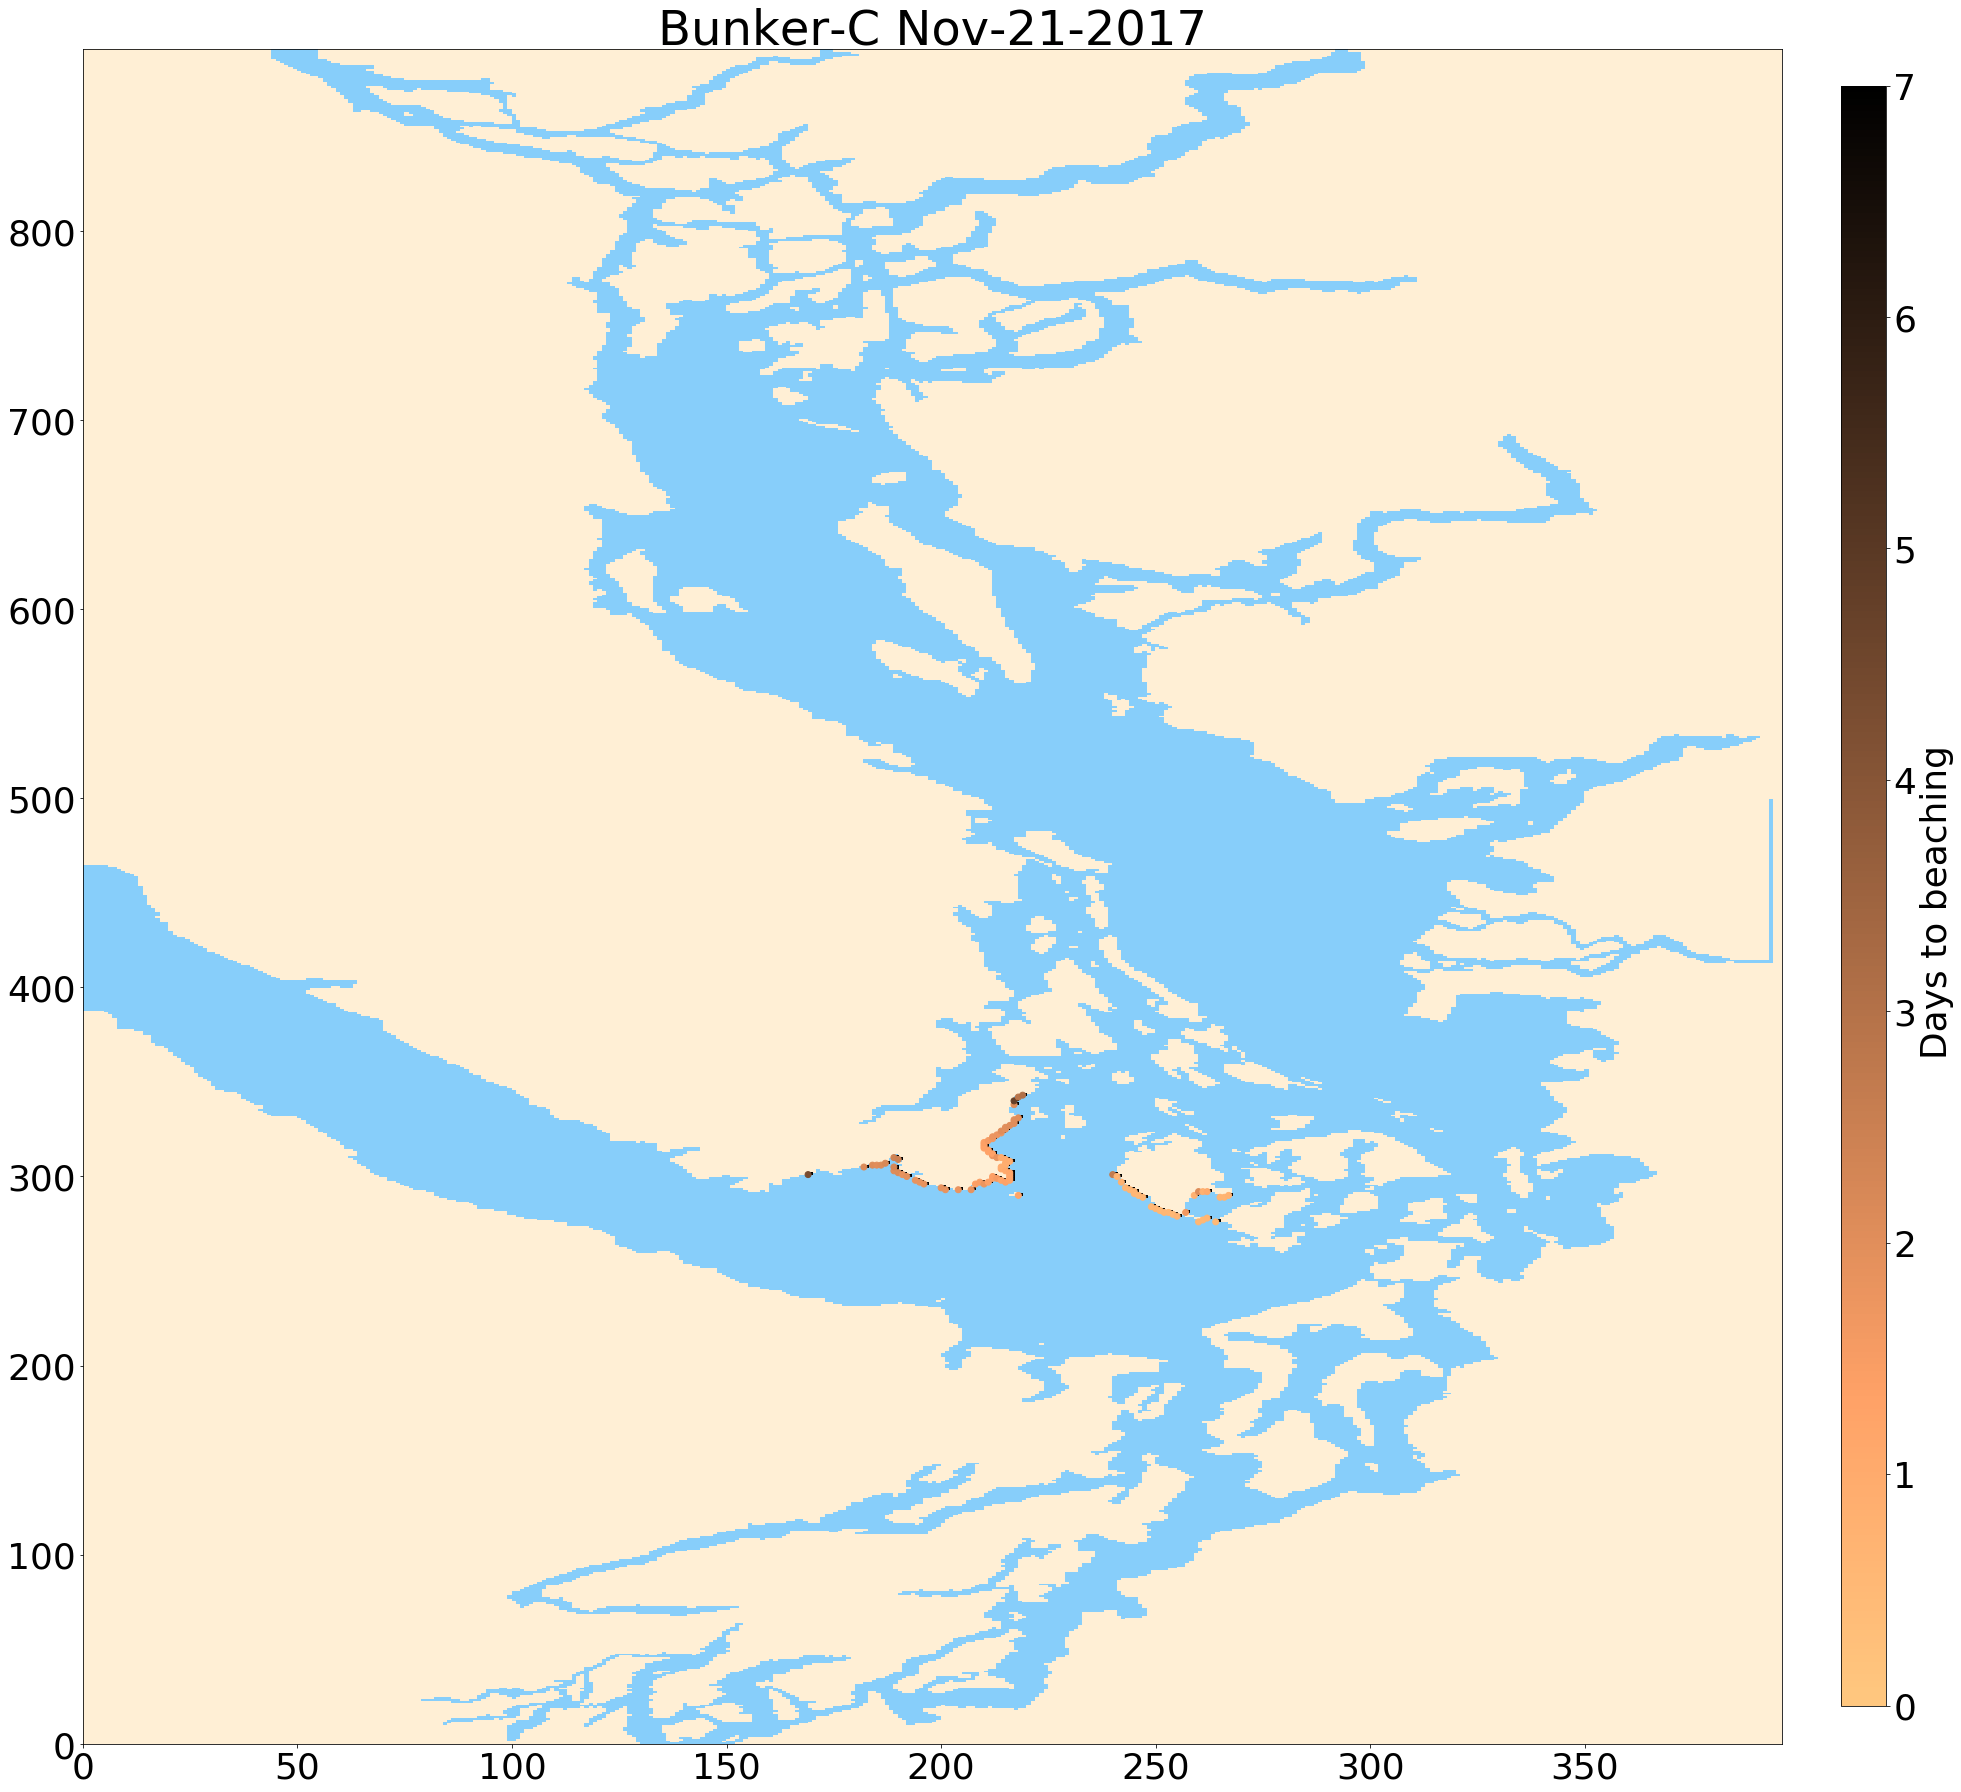

In [24]:
fig, ax = plt.subplots(figsize = (25,25))

# plotting the land mask
#for a in ax.flatten():
ax.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)

# set fontsize
fs = 48
fsa = 36

# setting titles
ax.set_title("Bunker-C Nov-21-2017", fontsize = fs) 

#plotting beaching scales
# convert to from beaching hours to beaching days
mesh = ax.pcolormesh(np.ma.masked_equal(f0['Beaching_Time'][:,:], 0), vmin = 0, vmax = 7, cmap = 'copper_r')
ax.scatter(xcoords0, ycoords0, c = values0/24, vmin = 0, vmax = 7, cmap = 'copper_r')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fsa) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fsa) 
    
plt.tight_layout();
    
p0 = ax.get_position().get_points().flatten()

#change second argument (currently 0.3) to adjust vertical position of colorbar
# change 4th argument (currently 0.05) to change thickness of colorbar
# Added buffer to colorbar length to preserve numbers with cropping
ax_cbar = fig.add_axes([1.025,0.05,0.025,.9])
cbar = plt.colorbar(mesh, cax=ax_cbar, orientation='vertical')
cbar.ax.tick_params(labelsize=fsa) 
cbar.set_label('Days to beaching ', fontsize = fsa);
fig.savefig(out_dir + 'BunkerC_BeachingTime_SOG21nov17.png', dpi = 700);